In [3]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import *
from qiskit import execute
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
from qiskit import Aer
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import math
import qiskit.tools.jupyter

In [4]:
!pip3 list | grep qiskit

qiskit                  0.34.2
qiskit-aer              0.10.3
qiskit-experiments      0.2.0
qiskit-finance          0.3.1
qiskit-ibmq-provider    0.18.3
qiskit-ignis            0.7.0
qiskit-machine-learning 0.3.1
qiskit-nature           0.3.1
qiskit-optimization     0.3.1
qiskit-terra            0.19.2


In [5]:
%qiskit_version_table

In [6]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr,cr)

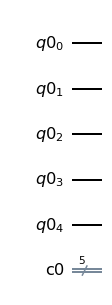

In [7]:
circuit.draw(output='mpl')

In [8]:
for x in range(0, 5):
    circuit.h(qr[x])

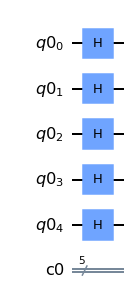

In [9]:
circuit.draw(output='mpl')

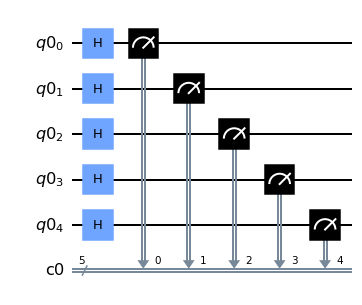

In [10]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('aer_simulator') #qasm_simulator
shots = 1024
sim_job = execute(circuit, backend=simulator,shots=shots,memory=True)
sim_result = sim_job.result()

/Users/karim/.pyenv/versions/3.10.2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/karim/.pyenv/versions/3.10.2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [12]:
sim_result

Result(backend_name='aer_simulator', backend_version='0.10.3', qobj_id='83d99449-bbfa-4f95-aa3f-30c1b5ee68c2', job_id='a4ea0862-7ae8-4588-981c-2560ff750d98', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0xa': 23, '0x3': 39, '0xb': 32, '0xc': 37, '0x1b': 31, '0x7': 29, '0x14': 20, '0x9': 19, '0x15': 34, '0x5': 28, '0x2': 26, '0x4': 32, '0x1': 32, '0x1a': 33, '0x12': 31, '0x1e': 33, '0x1c': 25, '0x10': 22, '0x19': 38, '0x6': 36, '0x1d': 27, '0x17': 40, '0xd': 33, '0xf': 33, '0xe': 34, '0x13': 39, '0x0': 41, '0x18': 43, '0x1f': 27, '0x16': 32, '0x8': 42, '0x11': 33}, memory=['0x11', '0x11', '0x6', '0x16', '0xf', '0x18', '0x0', '0x13', '0x15', '0x13', '0x18', '0x19', '0xd', '0x1d', '0x1c', '0x8', '0x1c', '0x1e', '0x12', '0x7', '0x1a', '0x4', '0x2', '0x13', '0xd', '0x7', '0x8', '0x8', '0xd', '0x5', '0x11', '0x0', '0x2', '0x4', '0x9', '0x14', '0x1f', '0x8', '0x1a', '0x1d', '0x6', '0x8', '0x1b', '0x13', '0x18', '0xc', '0x8'

In [13]:
#to retrieve the results independently, instead of as a probability
sim_memory = sim_result.get_memory()
sim_outputArray = []
for x in range(0, shots):
    converted = int(sim_memory[x], 2)
    sim_outputArray.append(converted)
print(sim_outputArray)

[17, 17, 6, 22, 15, 24, 0, 19, 21, 19, 24, 25, 13, 29, 28, 8, 28, 30, 18, 7, 26, 4, 2, 19, 13, 7, 8, 8, 13, 5, 17, 0, 2, 4, 9, 20, 31, 8, 26, 29, 6, 8, 27, 19, 24, 12, 8, 22, 26, 30, 24, 19, 4, 31, 13, 11, 20, 26, 14, 12, 8, 2, 14, 12, 30, 4, 26, 16, 3, 20, 27, 4, 29, 16, 23, 21, 0, 3, 26, 31, 10, 24, 1, 4, 17, 22, 6, 27, 9, 20, 24, 2, 19, 0, 24, 14, 12, 16, 12, 23, 19, 11, 8, 0, 27, 8, 4, 13, 20, 29, 22, 30, 30, 11, 11, 31, 31, 28, 10, 0, 31, 3, 4, 11, 22, 28, 12, 2, 19, 23, 30, 25, 11, 1, 1, 30, 27, 20, 7, 13, 31, 6, 30, 10, 25, 15, 4, 30, 4, 26, 8, 11, 15, 4, 21, 0, 23, 4, 11, 19, 13, 31, 19, 20, 22, 27, 13, 25, 6, 12, 1, 15, 13, 6, 29, 8, 22, 5, 3, 21, 30, 12, 7, 12, 5, 3, 13, 30, 4, 11, 24, 17, 9, 14, 23, 21, 15, 14, 16, 20, 24, 1, 0, 27, 27, 17, 18, 24, 26, 14, 18, 30, 22, 27, 6, 26, 5, 7, 24, 9, 8, 23, 0, 19, 2, 1, 13, 23, 0, 3, 23, 15, 19, 23, 13, 8, 6, 25, 9, 28, 8, 29, 11, 6, 15, 25, 11, 13, 12, 1, 13, 1, 23, 8, 13, 1, 0, 9, 27, 23, 23, 16, 23, 5, 17, 14, 3, 11, 9, 0, 26, 16,

In [14]:
len(sim_outputArray)

1024

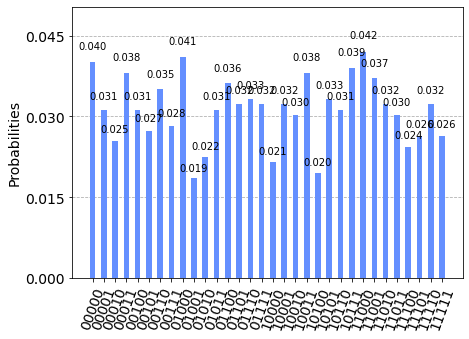

In [15]:
plot_histogram(sim_result.get_counts(circuit))

In [16]:
print(sim_memory)

['10001', '10001', '00110', '10110', '01111', '11000', '00000', '10011', '10101', '10011', '11000', '11001', '01101', '11101', '11100', '01000', '11100', '11110', '10010', '00111', '11010', '00100', '00010', '10011', '01101', '00111', '01000', '01000', '01101', '00101', '10001', '00000', '00010', '00100', '01001', '10100', '11111', '01000', '11010', '11101', '00110', '01000', '11011', '10011', '11000', '01100', '01000', '10110', '11010', '11110', '11000', '10011', '00100', '11111', '01101', '01011', '10100', '11010', '01110', '01100', '01000', '00010', '01110', '01100', '11110', '00100', '11010', '10000', '00011', '10100', '11011', '00100', '11101', '10000', '10111', '10101', '00000', '00011', '11010', '11111', '01010', '11000', '00001', '00100', '10001', '10110', '00110', '11011', '01001', '10100', '11000', '00010', '10011', '00000', '11000', '01110', '01100', '10000', '01100', '10111', '10011', '01011', '01000', '00000', '11011', '01000', '00100', '01101', '10100', '11101', '10110', 

Lets do the same on a quantum device

In [17]:
with open('/Users/karim/staff/cred/IBMQ/tocken.txt', 'r') as file:
    myTocken = file.read().replace('\n', '')
IBMQ.save_account(myTocken,overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider = IBMQ.get_provider('ibm-q')
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
backend = least_busy(small_devices)
backend.configuration().n_qubits

5

In [20]:
quantum_instance = QuantumInstance(backend=backend,shots=128, skip_qobj_validation = False)
quantum_instance.backend.status()

In [21]:
#provider = IBMQ.get_provider('ibm-q')
#qcomp = provider.get_backend('ibmq_16_melbourne')
shots = 1024
q_job = execute(circuit, backend, shots = shots, memory=True)

In [22]:
job_monitor(q_job)

Job Status: job has successfully run


In [ ]:
q_result = q_job.result()
q_memory = q_result.get_memory()
q_outputArray = []
for x in range(0, shots):
    converted = int(q_memory[x], 2)
    q_outputArray.append(converted)
print(q_outputArray)

In [ ]:
q_job.error_message()

In [ ]:
plot_histogram(q_result.get_counts(circuit))